<a href="https://colab.research.google.com/github/Arthur-Marsouin/2024_Geoinformatique_I/blob/main/S4_IP_exercice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice 4 - Fonction et calcul scientifique

## Numpy pour le calcul scientifique et Matplotlib

**Objectifs d'apprentissage**

* Cr√©er de nouveaux tableaux en utilisant `linspace` et `arange`.
* Calculer des formules de base avec les tableaux `numpy`.
Charger des donn√©es √† partir de fichiers `.npy` * Effectuer des r√©ductions (par exemple `.npy`)
* Effectuer des r√©ductions (par exemple `mean`, `std` sur les tableaux `numpy`)
* R√©aliser des trac√©s lin√©aires 1D
* R√©aliser des diagrammes de dispersion
* Annoter les graphiques avec des titres et des axes

Dans ce probl√®me, nous utilisons des donn√©es r√©elles provenant de flotteurs de profilage oc√©anique. Les flotteurs [ARGO](http://www.argo.ucsd.edu/) sont des instruments robotiques autonomes qui recueillent des donn√©es sur la temp√©rature, la salinit√© et la pression de l'oc√©an. Les flotteurs [ARGO](http://www.argo.ucsd.edu/) recueillent un "profil" (un ensemble de mesures √† diff√©rentes profondeurs ou "niveaux").

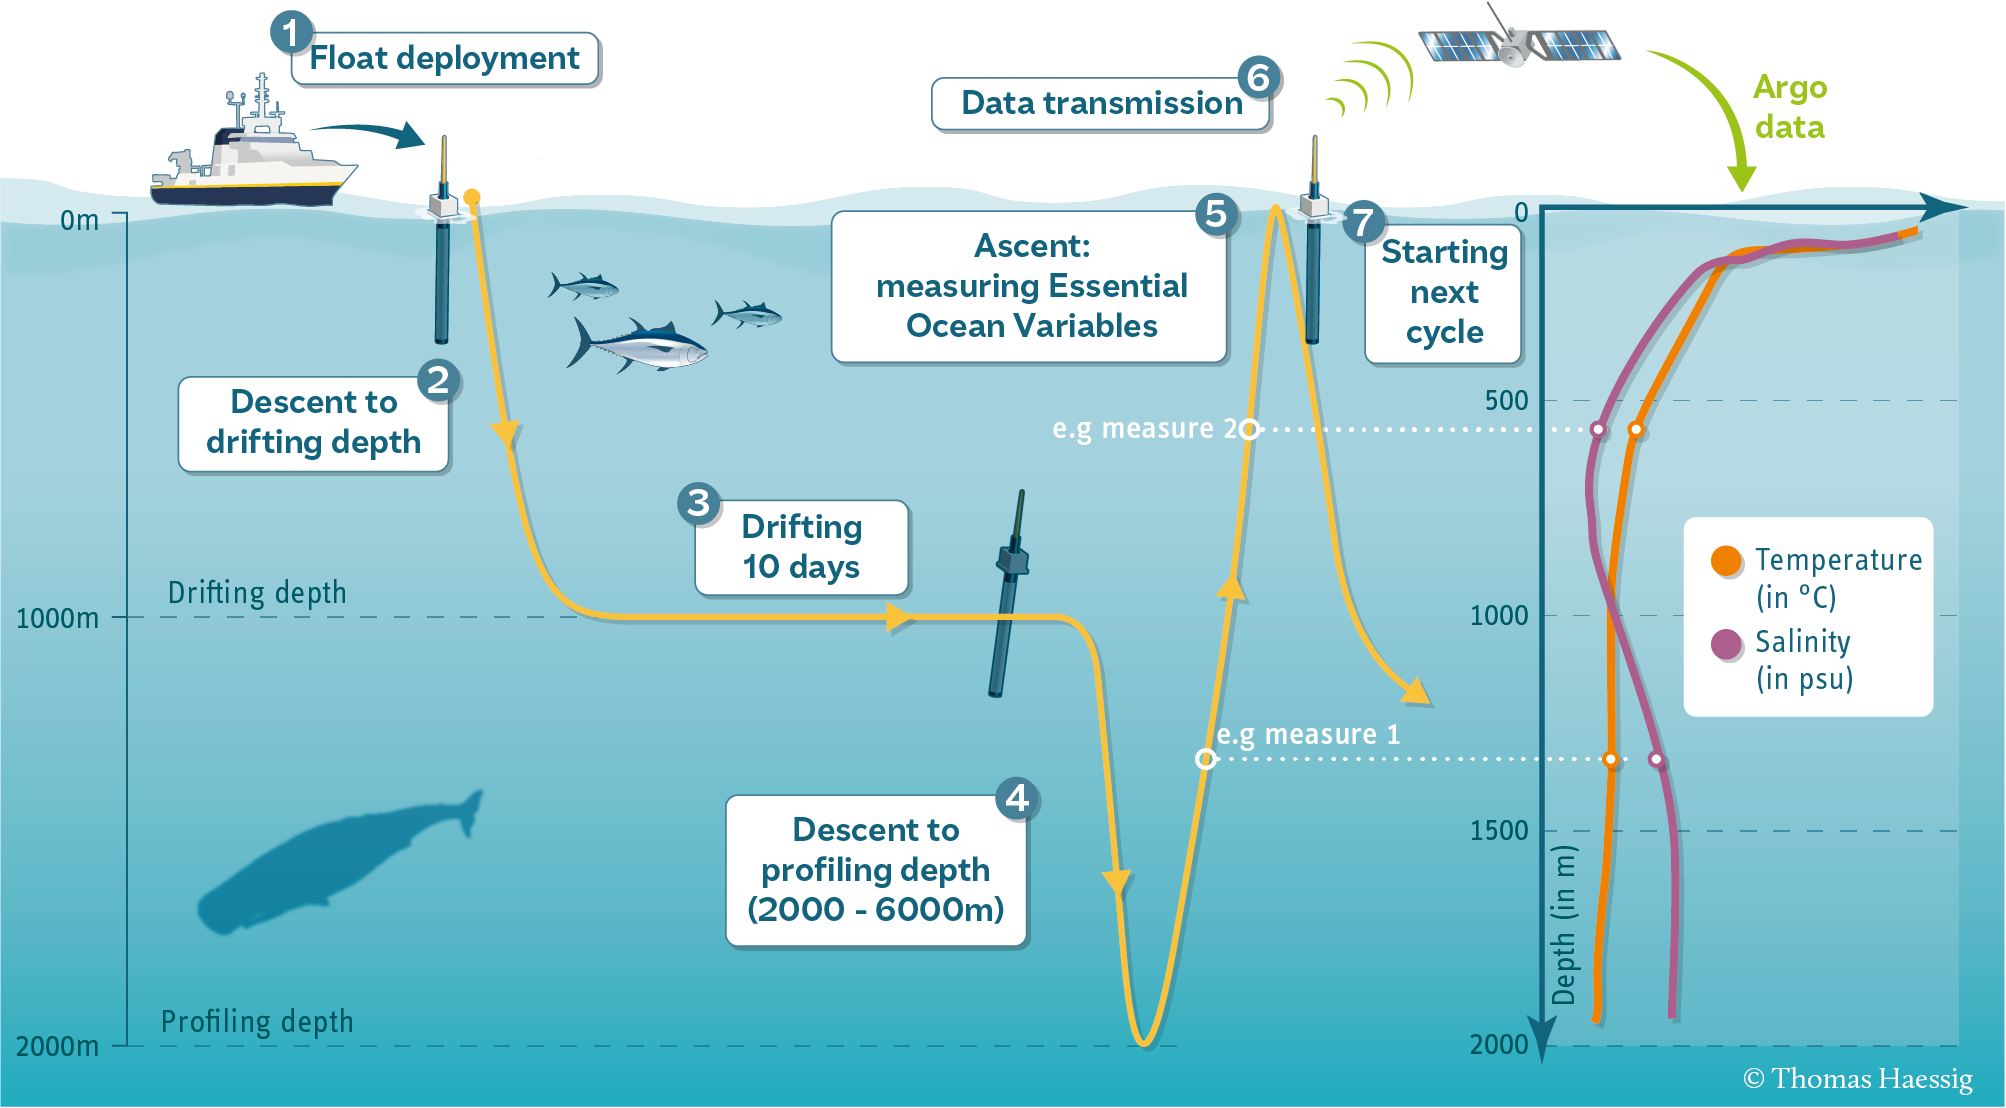


Chaque profil est associ√© √† une latitude, une longitude et une date, ainsi qu'√† de nombreux niveaux diff√©rents.

Commen√ßons par utiliser [pooch](https://www.fatiando.org/pooch/latest/) pour t√©l√©charger les fichiers de donn√©es dont nous avons besoin pour cet exercice. Le code suivant vous donnera une liste de fichiers `.npy` que vous pourrez ouvrir √† l'√©tape suivante.

In [3]:
import pooch

url = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ?download=1"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash='2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009')
files

Unzipping contents of '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ' to '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip'


['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy']

In [4]:
import numpy as np

**Q1) Chargez chaque fichier de donn√©es sous la forme d'un tableau `numpy`.**

Vous pouvez utiliser les noms que vous voulez pour vos tableaux, mais nous recommandons :

`T` : temp√©rature

`S` : salinit√©

`P` : pression

`date` : date

`lat` : latitude

`lon` : longitude

`level` : niveau de profondeur

Astuce 1 : Regardez le nom du fichier (les √©l√©ments dans `files`) pour savoir quel fichier correspond √† quelle variable.

Astuce 2 : Consultez la documentation de [`np.load`](https://numpy.org/doc/stable/reference/generated/numpy.load.html).

Afficher les noms des √©l√©ments des fichiers ici

In [5]:
files

['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy']

Ensuite, chargez les fichiers sous forme de tableaux `numpy`, par exemple en utilisant la compr√©hension de liste

In [6]:
lon,S,T,levels,lat,P,date = [np.load(files[i]) for i in range(len(files))]

**Q2) Recr√©ez le tableau `level` en utilisant `np.arange` et `np.linspace`**.

Conseils :

* La documentation de `np.arange` est [at this link](https://numpy.org/devdocs/reference/generated/numpy.arange.html)
* La documentation pour `np.linspace` est [√† ce lien](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
* La documentation pour `np.testing.assert_equal` est [at this link](https://numpy.org/doc/stable/reference/generated/numpy.testing.assert_equal.html)

Afficher le tableau `level` (niveau)

In [7]:
print(levels)
np.shape(levels)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


(78,)

In [34]:
print(S)

[[35.6389389  35.51495743 35.57297134 ... 35.82093811 35.77793884
  35.66891098]
 [35.63393784 35.5219574  35.57397079 ... 35.81093216 35.58389664
  35.66791153]
 [35.6819458  35.52595901 35.57297134 ... 35.79592896 35.66290665
  35.66591263]
 ...
 [34.91585922 34.92390442 34.92390442 ... 34.93481064 34.94081116
  34.94680786]
 [34.91585922 34.92390442 34.92190552 ... 34.93280792 34.93680954
  34.94380951]
 [34.91785812 34.92390442 34.92390442 ...         nan 34.93680954
          nan]]


Recr√©er le tableau `level` en utilisant `np.arange` et l'appeler `level_arange`

In [9]:
level_arange = np.arange(78)
print(level_arange)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


V√©rifiez que `level` et `level_arange` sont √©gaux en utilisant `np.testing.assert_equal`

In [13]:
np.testing.assert_equal(levels,level_arange)
# V√©rification du r√©ussite du test
print("Le test est valid√©!")

Le test est valid√©!


Recr√©er le tableau `level` en utilisant `np.linspace` et l'appeler `level_linspace`

In [21]:
level_linspace = np.linspace(0,77,78)

V√©rifiez que `level` et `level_linspace` sont √©gaux en utilisant `np.testing.assert_equal`

In [23]:
np.testing.assert_equal(levels,level_linspace)
# V√©rification du r√©ussite du test
print("Le test est valid√©!")
# Aper√ßu de level_linspace
print(level_linspace)

Le test est valid√©!
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77.]


**Q3) Examinez les formes de `T`, `S` et `P` par rapport √† `lon`, `lat`, `date` et `niveau`. Comment pensez-vous qu'ils sont li√©s ?**

Indice : consultez la sous-section [NDArrays](#NDArrays)

Afficher les formes de toutes les variables charg√©es

In [45]:
arrays1 = [T,S,P]
shapes1 = [arr.shape for arr in arrays1]
print(shapes1)

[(78, 75), (78, 75), (78, 75)]


In [40]:
arrays2 = [lon,lat,date]
shapes2 = [arr.shape for arr in arrays2]
print(shapes2)

[(75,), (75,), (75,)]


D'apr√®s les formes, quelles sont les dimensions partag√©es entre les tableaux ?

**Q4) En vous basant sur la formule ci-dessous, calculez la densit√© de l'eau de mer `relative_density`, par rapport √† l'eau pure, en fonction de la temp√©rature, de la salinit√© et de la pression.**

`densit√©_relative`$ = œÅ -œÅ_{Eau pure} = a \times S +b \times \Theta + c \times \Theta^{2}$

o√π :

* Les densit√©s $\rho$ et $œÅ_{Pure\ eau}$ sont exprim√©es en unit√©s $kg/m^{3}$.
* Les constantes $a$, $b$ et $c$ sont fournies ci-dessous.
* La fonction permettant de calculer la temp√©rature conservative $\Theta$ (en unit√©s Celcius) √† partir de la temp√©rature, de la salinit√© et de la pression est fournie ci-dessous.
* La temp√©rature $T$ est exprim√©e en unit√©s Celcius.
* La salinit√© $S$ est exprim√©e en unit√©s $g/kg$.
* La pression $p$ est exprim√©e en unit√©s $dbar$.

Astuce : Les tableaux `numpy` charg√©s `temperature`, `salinity`, et `pressure` ont d√©j√† les bonnes unit√©s et aucune conversion n'est n√©cessaire.

Sources :

1) [*Roquet, Fabien, et al. "Defining a simplified yet "realistic" equation of state for seawater." Journal of Physical Oceanography 45.10 (2015) : 2564-2579.*](https://journals.ametsoc.org/view/journals/phoc/45/10/jpo-d-15-0080.1.xml)

2) [*The Gibbs SeaWater (GSW)
Oceanographic Toolbox of TEOS-10*](https://www.teos-10.org/pubs/gsw/html/gsw_front_page.html). (Licence)](https://www.teos-10.org/pubs/gsw/html/gsw_licence.html)

Voici les constantes a, b et c :

In [46]:
a = 7.718e-1
b = -8.44e-2
c = -4.561e-3

Importons la biblioth√®que [`gsw`] (https://teos-10.github.io/GSW-Python/) qui contient la fonction `CS_from_t` pour calculer la temp√©rature conservative $\Theta$ √† partir de la temp√©rature, de la salinit√© et de la pression.

In [47]:
!pip install gsw
from gsw import CT_from_t

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.4/2.4 MB 21.1 MB/s eta 0:00:00


Maintenant, c'est √† vous de jouer. Voici l'√©quation pour √©viter d'avoir √† faire d√©filer la page vers le haut :

`densit√©_relative`$ = œÅ -œÅ_{Pure\ Eau} = a \times S +b \times \Theta + c \times \Theta^{2}$

Calculer la temp√©rature conservatrice

Conseil : utilisez [CT_from_t](https://www.teos-10.org/pubs/gsw/html/gsw_CT_from_t.html)

In [48]:
# Calcul de la temp√©rature conservative (CT)
CT = CT_from_t(S,T,P)
print(CT)

[[18.95038389 18.41702486 19.07746816 ... 19.0838613  21.79604023
  20.10691816]
 [18.7167823  18.37902205 19.05973411 ... 18.44249588 19.43744461
  20.10022206]
 [18.34343364 18.3522886  19.04195407 ... 18.20006431 19.23615405
  20.05124564]
 ...
 [ 3.6359899   3.65662809  3.64478998 ...  3.64962307  3.65341962
   3.70166094]
 [ 3.60272526  3.61639726  3.59575608 ...  3.59259633  3.58470724
   3.6437391 ]
 [ 3.57826951  3.58028581  3.55956863 ...         nan  3.54839488
          nan]]


Calculez la "densit√© relative" √† l'aide de l'√©quation ci-dessus.

In [50]:
relativ_density = a*S + b*CT + c*(CT**2)
print(relativ_density)

[[24.26878778 24.30901623 24.18510597 ... 24.37483439 23.60704513
  23.98828331]
 [24.32477667 24.32400413 24.19045883 ... 24.53101768 24.09992029
  23.98930505]
 [24.45644758 24.33382758 24.19427794 ... 24.58041622 24.21339484
  24.000865  ]
 ...
 [26.58088425 26.58466521 26.58605858 ... 26.59390729 26.5980916
  26.59702996]
 [26.58479005 26.58939524 26.59027359 ... 26.59905835 26.60307089
  26.60154496]
 [26.58919785 26.59362837 26.59605156 ...         nan 26.60731704
          nan]]


In [52]:
# Deuxi√®me m√©thode propos√©e par Copilot (int√©ressant de comparer)
import gsw
density = gsw.density.rho(S, T, P)
print(f"La densit√© de l'eau de mer est de {density} kg/m¬≥")

La densit√© de l'eau de mer est de [[1025.41570794 1025.45546362 1025.33269865 ... 1025.51827833
  1024.75765595 1025.13497781]
 [1025.4882792  1025.48956992 1025.3547094  ... 1025.69017417
  1025.26748727 1025.15264803]
 [1025.6398661  1025.51430706 1025.37781274 ... 1025.76178079
  1025.39772092 1025.18763046]
 ...
 [1036.27459818 1036.27497974 1036.27768978 ... 1036.28316038
  1036.29032989 1036.28486355]
 [1036.49883748 1036.50338647 1036.5045901  ... 1036.51661923
  1036.51915679 1036.5132059 ]
 [1036.72350878 1036.72209882 1036.72754334 ...           nan
  1036.74768948           nan]] kg/m¬≥


**Q4) Faites un graphique pour chaque colonne de donn√©es dans `T`, `S`, `P`, et
`densit√©_relative` (quatre plots)**

Pour cette question, nous devons utiliser l'interface [Pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) de la biblioth√®que [Matplotlib](https://matplotlib.org/) pour la visualisation, m√™me si nous ne l'avons pas encore √©tudi√©e en profondeur en classe. Mais n'ayez crainte, nous vous fournissons des instructions faciles √† suivre ci-dessous. üòä

La premi√®re √©tape consiste √† importer Pyplot. Il suffit d'ex√©cuter le code ci-dessous.

In [53]:
import matplotlib.pyplot as plt

Ensuite, nous tracerons les variables en fonction de la profondeur de l'oc√©an, `level`. Il suffit de lire la documentation [sur ce lien] (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) pour en d√©duire la syntaxe correcte. Etiquetez vos axes en utilisant `plt.xlabel` et `plt.ylabel`, et ajoutez un titre en utilisant `plt.title`.

Astuce : L'√©chelle verticale doit utiliser les donn√©es `level` pour √™tre coh√©rente avec les conventions oc√©anographiques.

Conseil 2 : Chaque graphique doit avoir une ligne pour chaque colonne de donn√©es. Le r√©sultat sera d√©sordonn√©, comme dans le graphique ci-dessous :

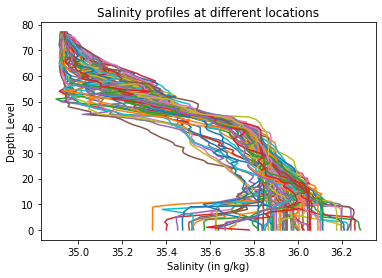

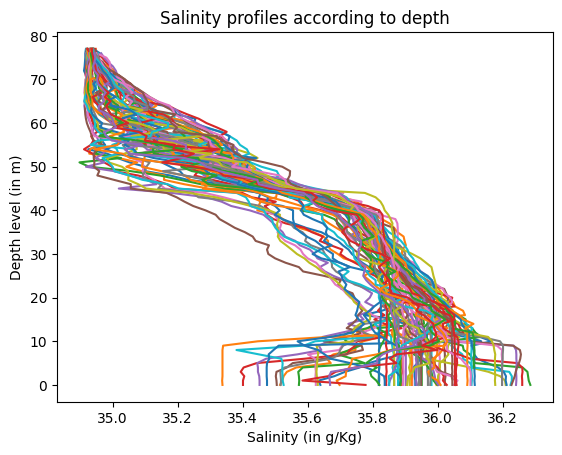

In [58]:
# Graphique pour la salinit√© (S)
plt.plot(S,levels) ; # Le point-virgule emp√™che l'impression des objets de ligne
plt.xlabel("Salinity (in g/Kg)") # Prend une cha√Æne de caract√®res comme argument
plt.ylabel("Depth level (in m)")
plt.title("Salinity profiles according to depth")
plt.show()

Faites plus de plots ci-dessous:

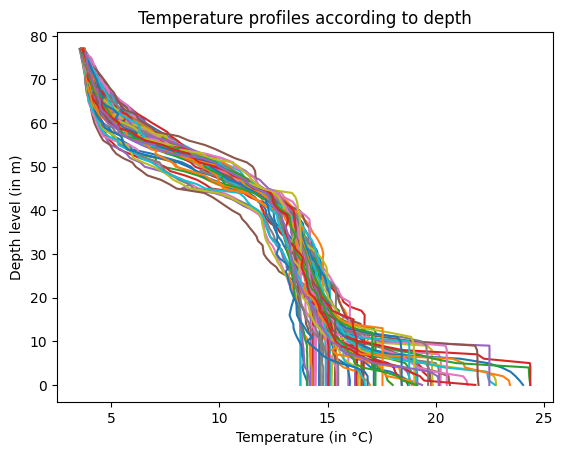

In [59]:
# Graphique pour la temp√©rature (T)
plt.plot(T,levels)
plt.xlabel("Temperature (in ¬∞C)")
plt.ylabel("Depth level (in m)")
plt.title("Temperature profiles according to depth")
plt.show()

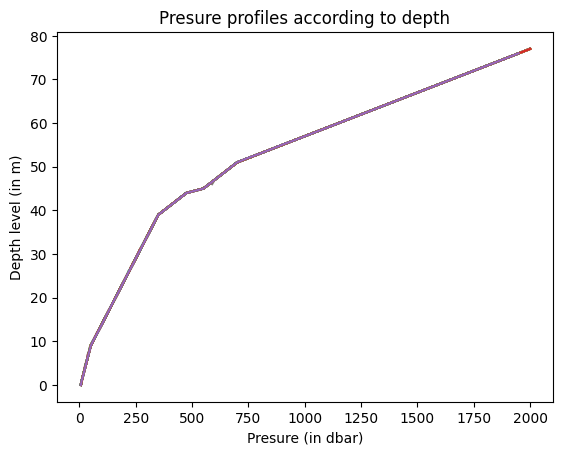

In [60]:
# Graphique pour la pression (P)
plt.plot(P,levels) ;
plt.xlabel("Presure (in dbar)")
plt.ylabel("Depth level (in m)")
plt.title("Presure profiles according to depth")
plt.show()

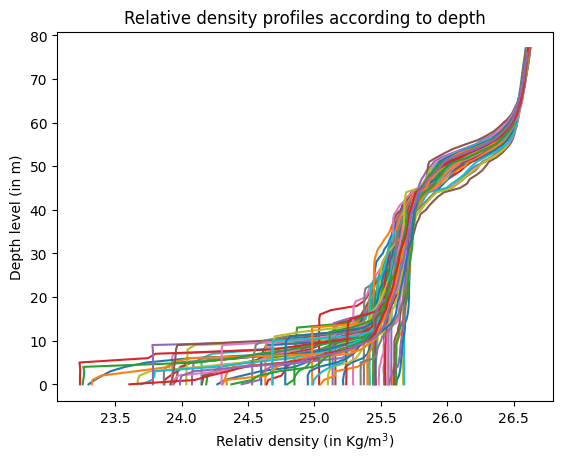

In [62]:
# Graphique pour la densit√© relative (relativ_density)
plt.plot(relativ_density,levels) ;
plt.xlabel("Relativ density (in Kg/m$^3$)")
plt.ylabel("Depth level (in m)")
plt.title("Relative density profiles according to depth")
plt.show()

**Q5) Calculez la moyenne et l'√©cart-type de `T`, `S`, `P`, et `seawater_density` √† chaque profondeur dans `level`.

Conseil : Vous pouvez lire la documentation sur [ce lien](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) et [ce lien](https://numpy.org/doc/stable/reference/generated/numpy.std.html).

Conseil 2 : Vous pouvez v√©rifier que vous avez pris la moyenne et les √©carts types le long des axes corrects en v√©rifiant la "forme" de vos r√©sultats.

Calculer les moyennes...

In [101]:
# Nouvel array de donn√©e
moy_std_arr = [T,S,P,relativ_density]
# Comme demand√©
T_moy = np.mean(T,axis=1)
print(T_moy)
# En ignorant le valeurs np.nan
T_moy = np.nanmean(T,axis=1)
print(f"Sans valeurs nan : \n{T_moy}")

[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan 10.80430666 10.49702667
 10.1749066   9.83453334  9.48625332  9.19793334  8.66010666  8.12324001
  7.60221333  7.15289333  6.74250667  6.39543999  6.04598667  5.74538665
  5.48913333  5.26604001  5.08768     4.93479998  4.77769334  4.65368
  4.54237334  4.44274664  4.35933333         nan         nan         nan
         nan         nan         nan         nan         nan         nan]
Sans valeurs nan : 
[17.60172602 17.57223609 17.51458

In [103]:
# Comme demand√©
# avec une compr√©hension de liste :
# print([np.mean(arr,axis=1) for arr in arrays1])

# Avec une fonction:
def moy(array):
  for arr in array:
    print(np.mean(arr,axis=1), end = "\n\n")
moy(moy_std_arr)

[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan 10.80430666 10.49702667
 10.1749066   9.83453334  9.48625332  9.19793334  8.66010666  8.12324001
  7.60221333  7.15289333  6.74250667  6.39543999  6.04598667  5.74538665
  5.48913333  5.26604001  5.08768     4.93479998  4.77769334  4.65368
  4.54237334  4.44274664  4.35933333         nan         nan         nan
         nan         nan         nan         nan         nan         nan]

[        nan         nan         nan         nan    

In [141]:
# En ignorant le valeurs np.nan
print("Sans valeurs nan : \n")
# Avec une compr√©hension de liste
# print([np.nanmean(arr,axis=1) for arr in arrays1])

# Avec une fonction :
def nanmoy(array):
  nan_moy_res = []
  for arr in array:
    nan_moy_res.append(np.nanmean(arr,axis=1))
    # print(np.nanmean(arr,axis=1), end = "\n\n") -> pour une meilleure visibilit√©
  return nan_moy_res
nanmoy(moy_std_arr)

Sans valeurs nan : 



[array([17.60172602, 17.57223609, 17.5145833 , 17.42326395, 17.24943838,
        17.03730134, 16.76787661, 16.44609588, 16.17439195, 16.04501356,
        15.65827023, 15.4607296 , 15.26114862, 15.12489191, 14.99133783,
        14.90160808, 14.81990544, 14.74535139, 14.66822971, 14.585027  ,
        14.49732434, 14.41904053, 14.35412163, 14.27102702, 14.19081082,
        14.11487838, 14.04347293, 13.98067566, 13.90994595, 13.83274319,
        13.76139196, 13.69836479, 13.62335132, 13.54185131, 13.46647295,
        13.39395946, 13.32541891, 13.25205403, 13.18131082, 13.10233782,
        12.89268916, 12.67795943, 12.4649189 , 12.2178513 , 11.98270268,
        11.1281081 , 10.80430666, 10.49702667, 10.1749066 ,  9.83453334,
         9.48625332,  9.19793334,  8.66010666,  8.12324001,  7.60221333,
         7.15289333,  6.74250667,  6.39543999,  6.04598667,  5.74538665,
         5.48913333,  5.26604001,  5.08768   ,  4.93479998,  4.77769334,
         4.65368   ,  4.54237334,  4.44274664,  4.3

... et les √©carts types.

In [120]:
# Directement avec une fonction :
def ecart(arrays):
  for arr in arrays:
    print(np.std(arr,axis=1), end = "\n\n")
ecart(moy_std_arr)

[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.84204226 0.90031954
 0.94661515 0.9902255  1.01786435 1.01690775 1.01944275 0.97987767
 0.94359878 0.88207755 0.82934499 0.7859263  0.71755907 0.68351183
 0.64382025 0.58990336 0.55077313 0.50187175 0.45673872 0.4085324
 0.36748504 0.33272584 0.2996815         nan        nan        nan
        nan        nan        nan        nan        nan        nan]

[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan      

In [128]:
# Sans les valeurs nan :
print("Sans valeurs nan : \n")

def nanecart(arrays):
  nan_ecart_res = []
  for arr in arrays:
    nan_ecart_res.append(np.nanstd(arr,axis=1))
    # print(np.nanstd(arr,axis=1), end = "\n\n") -> pour une meilleure visibilit√©
  return nan_ecart_res
nanecart(moy_std_arr)

Sans valeurs nan : 



[array([2.92500898, 2.86405591, 2.83324563, 2.75112353, 2.60248422,
        2.42649165, 2.20220589, 1.99752543, 1.79105862, 1.74132795,
        1.26608465, 1.07857596, 0.89761236, 0.79748479, 0.68525328,
        0.6394096 , 0.61835635, 0.59387877, 0.56010736, 0.55009107,
        0.53183794, 0.52634089, 0.52668259, 0.51009182, 0.49376838,
        0.48980214, 0.48551874, 0.48516171, 0.49244536, 0.50557331,
        0.50881718, 0.50482633, 0.50093284, 0.51411271, 0.50962002,
        0.51399949, 0.52544584, 0.53182873, 0.5466501 , 0.55060902,
        0.56066216, 0.57937588, 0.5989958 , 0.63392862, 0.70640057,
        0.85775269, 0.84204226, 0.90031954, 0.94661515, 0.9902255 ,
        1.01786435, 1.01690775, 1.01944275, 0.97987767, 0.94359878,
        0.88207755, 0.82934499, 0.7859263 , 0.71755907, 0.68351183,
        0.64382025, 0.58990336, 0.55077313, 0.50187175, 0.45673872,
        0.4085324 , 0.36748504, 0.33272584, 0.2996815 , 0.25570195,
        0.21802589, 0.17365755, 0.14408683, 0.11

V√©rifiez qu'elles ont la m√™me forme que vos coordonn√©es de niveau vertical `levels` :

In [147]:
nan_ecart_res = nanecart(moy_std_arr)
for result in nan_ecart_res:
  np.testing.assert_equal(result.shape,levels.shape)
print("Toutes les formes sont √©gales √† celle de 'levels'.")

Toutes les formes sont √©gales √† celle de 'levels'.


**Q6) Faites maintenant des trac√©s similaires, mais ne montrez que les moyennes `T`, `S`, `P`, et `densit√©_de_l'eau_de_mer` √† chaque profondeur. Faites appara√Ætre les barres d'erreur sur chaque graphique en utilisant les √©carts-types**.

Astuce : Si vous vous sentez aventureux, vous pouvez utiliser directement la fonction [`plt.errorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html).

Astuce 2 : Vous devriez obtenir des graphiques similaires √† celui ci-dessous

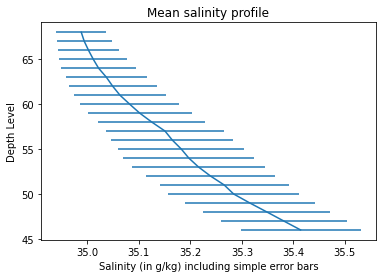

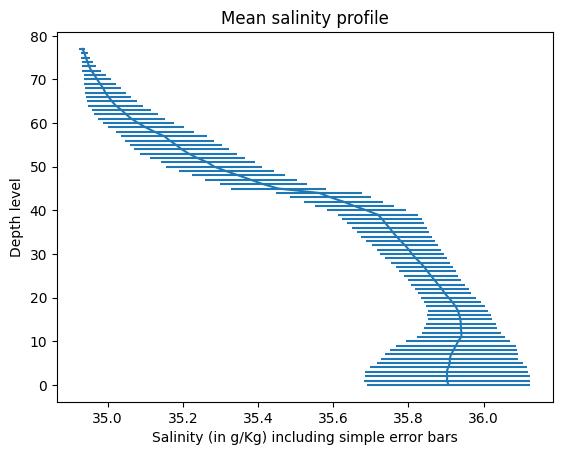

In [149]:
# D√©finition des valeurs pour S :
nan_ecart_res = nanecart(moy_std_arr)
S_nan_ecart_res = nan_ecart_res[1]

nan_moy_res = nanmoy(moy_std_arr)
S_nan_moy_res = nan_moy_res[1]

# Cr√©ation du graph :
plt.errorbar(S_nan_moy_res,levels,xerr = S_nan_ecart_res)
plt.xlabel("Salinity (in g/Kg) including simple error bars")
plt.ylabel("Depth level")
plt.title("Mean salinity profile")
plt.show()

Encore trois plots et nous serons pr√™ts üôÇ .

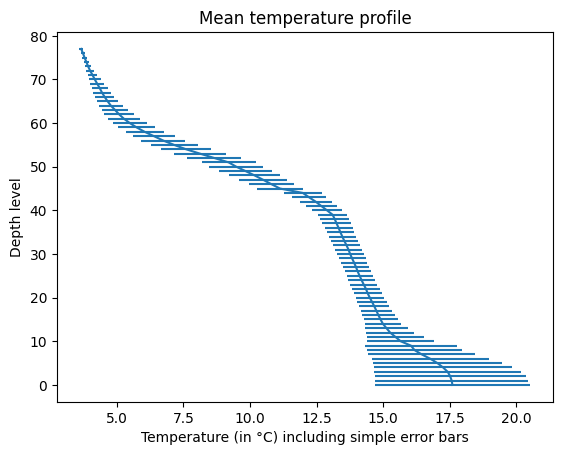

In [150]:
# D√©finition des valeurs pour T :
nan_ecart_res = nanecart(moy_std_arr)
T_nan_ecart_res = nan_ecart_res[0]

nan_moy_res = nanmoy(moy_std_arr)
T_nan_moy_res = nan_moy_res[0]

# Cr√©ation du graph :
plt.errorbar(T_nan_moy_res,levels,xerr = T_nan_ecart_res)
plt.xlabel("Temperature (in ¬∞C) including simple error bars")
plt.ylabel("Depth level")
plt.title("Mean temperature profile")
plt.show()

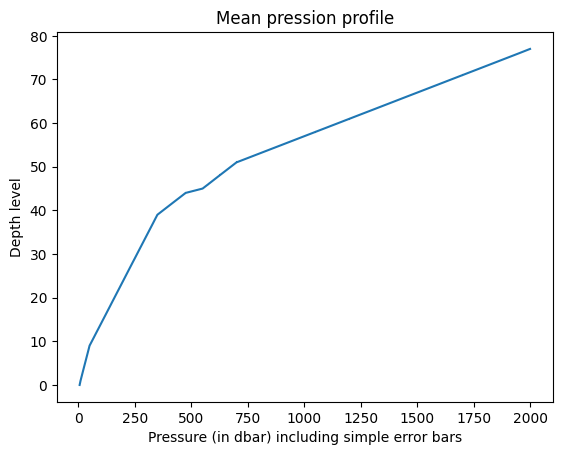

In [151]:
# D√©finition des valeurs pour P :
nan_ecart_res = nanecart(moy_std_arr)
P_nan_ecart_res = nan_ecart_res[2]

nan_moy_res = nanmoy(moy_std_arr)
P_nan_moy_res = nan_moy_res[2]

# Cr√©ation du graph :
plt.errorbar(P_nan_moy_res,levels,xerr = P_nan_ecart_res)
plt.xlabel("Pressure (in dbar) including simple error bars")
plt.ylabel("Depth level")
plt.title("Mean pression profile")
plt.show()

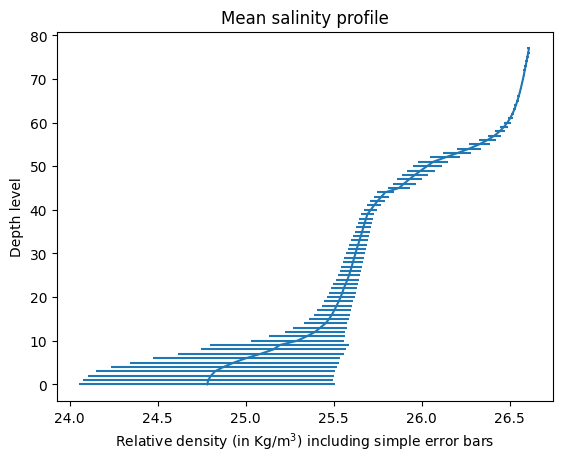

In [152]:
# D√©finition des valeurs pour relative density :
nan_ecart_res = nanecart(moy_std_arr)
Rd_nan_ecart_res = nan_ecart_res[3]

nan_moy_res = nanmoy(moy_std_arr)
Rd_nan_moy_res = nan_moy_res[3]

# Cr√©ation du graph :
plt.errorbar(Rd_nan_moy_res,levels,xerr = Rd_nan_ecart_res)
plt.xlabel("Relative density (in Kg/m$^3$) including simple error bars")
plt.ylabel("Depth level")
plt.title("Mean salinity profile")
plt.show()

**Q7) Prise en compte des donn√©es manquantes**

Les profils contiennent de nombreuses valeurs manquantes. Celles-ci sont indiqu√©es par la valeur sp√©ciale "Not a Number", ou `np.nan`.

Lorsque vous prenez la moyenne ou l'√©cart type des donn√©es contenant des NaN, le r√©sultat entier devient `NaN`. Au lieu de cela, si vous utilisez les fonctions sp√©ciales `np.nanmean` et `np.nanstd`, vous dites √† NumPy d'ignorer les NaN.

Recalculez les moyennes et les √©carts types comme dans les sections pr√©c√©dentes en utilisant ces fonctions et tracez les r√©sultats.

Conseil : Liens vers la documentation [`np.nanmean`](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html) et la documentation [`np.nanstd`](https://numpy.org/doc/stable/reference/generated/numpy.nanstd.html).

Recalculez les moyennes ci-dessous en ignorant les valeurs manquantes. Nous esp√©rons que vous pouvez maintenant trouver la syntaxe compl√®te vous-m√™me üòé

In [ ]:
# Cf. plus haut

De m√™me, recalculez les √©carts types en ignorant les valeurs manquantes.

In [ ]:
# Cf. plus haut

**Q8) Cr√©ez un diagramme de dispersion des coordonn√©es longitudinales (`lon`) et latitudinales (`lat`) des flotteurs ARGO.**

Encore une fois, nous n'en avons pas parl√© dans le tutoriel, mais il existe une fonction de diagramme de dispersion tr√®s pratique appel√©e [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) fournie par l'interface Pyplot.

Bonus : Etiqueter votre figure en utilisant `plt.xlabel`, `plt.ylabel`, et `plt.title`.

Bonus 2 : Augmentez la taille de police de vos √©tiquettes en ajoutant un argument `fontsize=` aux fonctions d'√©tiquettes.

Bonus 3 : Rendez votre diagramme de dispersion plus beau en changeant les arguments de [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) list√©s dans la documentation, par exemple `s=`.

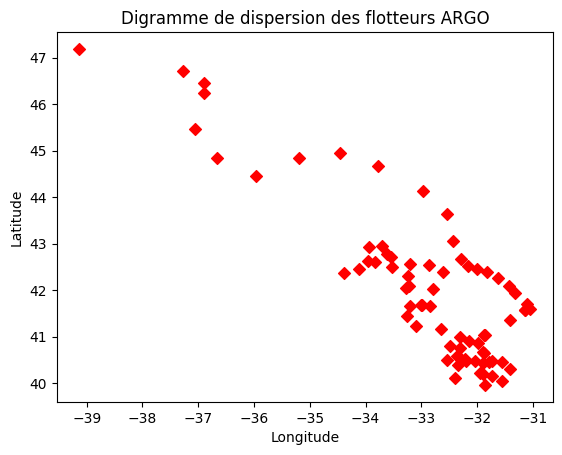

In [170]:
plt.scatter(lon,lat, c = "red", marker = "D")
plt.xlabel("Longitude") # Bonus
plt.ylabel("Latitude") # Plus de bonus
plt.title("Digramme de dispersion des flotteurs ARGO") # Encore plus de bonus
plt.show() # Encore encore plus de bonus

## Fonctions

**Q1) Ecrivez une fonction pour convertir l'unit√© que vous avez choisie pour les masses plan√©taires en $M_{Terre}$, la masse de la Terre**.

Par exemple, la masse de Jupiter est :

$M_{Jupiter} \approx 1898\times10^{24}kg \approx 318 M_{Terre}$

In [20]:
# Write your code here
planetdict = {'mercure':0.330,'v√©nus':4.87,'terre':5.97,
              'mars':0.642,'jupiter':1898,'saturne':568,'uranus':86.8,'neptune':102, 'pluto':0.013}

# unit: 10^24 kg

In [7]:
# Ecrivez votre fonction ici
# La fonction doit prendre la masse de la plan√®te que vous voulez (par exemple, planetdict['mars']) et la diviser par la masse de la Terre.
# (planetdict['terre'])
def convert_mass_Mterre(planete):
  return planetdict[planete]/planetdict['terre']

#tester que cela fonctionne pour jupiter (planetdict['jupiter']), la fonction devrait retourner 317.92294807370183
convert_mass_Mterre("jupiter")

317.92294807370183

**Q2) Ecrivez maintenant une fonction unique qui peut convertir l'unit√© que vous avez choisie pour les masses plan√©taires en $M_{Terre}$ ou $M_{Jupiter}$ selon le mot-cl√© que vous avez sp√©cifi√©**.

In [15]:
# √âcrivez votre fonction ici
def convert_m_Mterrejupiter(yourplanet,ourplanet='jupiter') :
  return planetdict[yourplanet]/planetdict[ourplanet]

# V√©rifiez que votre fonction fonctionne : convertissez Mjupiter en Mterre et Mjupiter,
# Vous devriez voir 317.923 (Mterre) et 1.0 (Mjupiter)
print(round(convert_m_Mterrejupiter("jupiter", "terre"),3),convert_m_Mterrejupiter('jupiter'))

317.923 1.0


In [33]:
# Stocker le Mjupiter pour Q3
Mjupiter = convert_m_Mterrejupiter('jupiter')

1.0


**Q3) Ecrivez une fonction qui prend un argument (la masse en $M_{Jupiter}$) et renvoie deux arguments (la masse en $M_{Terre}$ et la masse dans l'unit√© que vous avez choisie [la plan√®te que vous voulez]).

In [34]:
# √âcrivez votre fonction ici
def mass_conversion_two_arguments(mass,planet="neptune") :
  a = mass/planetdict["terre"] # Terre
  b = mass/planetdict[planet] # La plan√®te que vous voulez utiliser comme r√©f√©rence
  return a,b
# V√©rifiez que la conversion de la masse de Jupiter en $M_{Terre}$ et en $M_{Terre}$ fonctionne.
# l'unit√© choisie (par exemple, la plan√®te Mars)
M_jupiter = planetdict["jupiter"]
print(mass_conversion_two_arguments(M_jupiter,'neptune'))

(317.92294807370183, 18.607843137254903)


In [31]:
planetdict = {
    'mercure': 0.330,
    'v√©nus': 4.87,
    'terre': 5.97,
    'mars': 0.642,
    'jupiter': 1898,
    'saturne': 568,
    'uranus': 86.8,
    'neptune': 102,  # Correction ici
    'pluto': 0.013
}

# √âcrivez votre fonction ici
def mass_conversion_two_arguments(mass, planet="neptune"):
    a = mass / planetdict["terre"]  # Masse en M_Terre
    b = mass / planetdict[planet]    # Masse par rapport √† la plan√®te choisie
    return a, b

# V√©rifiez que la conversion de la masse de Jupiter en $M_{Terre}$ et en $M_{neptune}$ fonctionne.
jupiter_mass = planetdict["jupiter"]
print(mass_conversion_two_arguments(jupiter_mass, 'neptune'))

(317.92294807370183, 18.607843137254903)


In [ ]:
# Bonus : Utilisez la fonction de Q10 pour convertir la masse de Neptune en $M_{Jupiter}$.
# puis la fonction de Q3 pour la reconvertir dans l'unit√© que vous avez choisie
# Retrouvez-vous la valeur originale ?